# Vedio Game Analysis

# IMPORTING THE LIBRARIES

In [112]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the data set 

In [113]:
df=pd.read_csv(r"C:\Users\vanda\OneDrive\Desktop\PySpider\project1\vgsales.csv")

UNDERSTAND EACH COLUMN

In [114]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

| Column         | Description                                                      |
| -------------- | ---------------------------------------------------------------- |
| `Rank`         | Rank of the game based on global sales (1 = highest).            |
| `Name`         | Name/title of the video game.                                    |
| `Platform`     | Gaming platform (e.g., PS4, Xbox, Wii) the game was released on. |
| `Year`         | Year the game was released.                                      |
| `Genre`        | Type of game (e.g., Action, Sports, RPG).                        |
| `Publisher`    | Name of the company that published the game.                     |
| `NA_Sales`     | Sales in North America (in millions of units).                   |
| `EU_Sales`     | Sales in Europe (in millions of units).                          |
| `JP_Sales`     | Sales in Japan (in millions of units).                           |
| `Other_Sales`  | Sales in other regions (in millions of units).                   |
| `Global_Sales` | Total global sales (in millions of units).                       |


GET THE INFORMATION OF COLUMNS AND NOTE THE OBSERVATION

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Observation

year - contains the 271  missing values

publisher - it has 58 missing values

year -  this column is in float dtype

understand the data inside the dataframe using head()

In [116]:
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Data cleaning

1. Check for Missing Values

In [117]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

2. Fill Missing Values in Year with Mode

In [118]:
# Replace missing years with the most frequent year and publisher with unkonwn
year_mode = df['Year'].mode()[0]
df['Year'] = df['Year'].fillna(year_mode)

df['Publisher'] = df['Publisher'].fillna('Unknown')



In [119]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [120]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.448789,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.790533,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


3. Convert Year to Integer

In [121]:
df['Year'] = df['Year'].astype(int)

In [122]:
df['Year']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16598, dtype: int64

In [123]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


4. Drop rows with missing 'Name' or 'Platform'

In [124]:
df.dropna(subset=['Name', 'Platform'], inplace=True)

5. check and Remove duplicates

In [125]:
df.duplicated().any()

np.False_

6. Recalculate Global Sales and fix mismatches

In [126]:
# Step 1: Recalculate Global Sales from regional data
df['Calculated_Global'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

# Step 2: If there's a mismatch, update the Global_Sales
df.loc[(df['Global_Sales'] - df['Calculated_Global']).abs() > 0.01, 'Global_Sales'] = df['Calculated_Global']

# Step 3: Drop the helper column
df.drop(columns=['Calculated_Global'], inplace=True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [128]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# DATA TRANSFORMATION

In [129]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

1. Create a column with the region that had the highest sales for each game

In [130]:

df['Top_Region'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(axis=1)

# Compares sales across regions and assigns the region with the 
# maximum value to a new column Top_Region.

In [131]:
df['Top_Region']

0        NA_Sales
1        NA_Sales
2        NA_Sales
3        NA_Sales
4        NA_Sales
           ...   
16593    NA_Sales
16594    NA_Sales
16595    NA_Sales
16596    EU_Sales
16597    NA_Sales
Name: Top_Region, Length: 16598, dtype: object

2.classify games into "High", "Medium", "Low" sellers based on global sales?

In [132]:
def classify_sales(sales):
    if sales >= 20:
        return 'High'
    elif sales >= 5:
        return 'Medium'
    else:
        return 'Low'

df['Sales_Category'] = df['Global_Sales'].apply(classify_sales)

In [133]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Top_Region,Sales_Category
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,NA_Sales,High
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NA_Sales,High
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,NA_Sales,High
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,NA_Sales,High
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,NA_Sales,High


3. extract the decade from the release year?

In [134]:
df['Decade'] = (df['Year'] // 10) * 10

In [135]:
df['Decade'] # Groups games by the decade (e.g., 1990s, 2000s) for time-based trend analysis.

0        2000
1        1980
2        2000
3        2000
4        1990
         ... 
16593    2000
16594    2000
16595    2000
16596    2010
16597    2000
Name: Decade, Length: 16598, dtype: int64

4. calculate the % share of each region's sales in total global sales?

In [136]:
df['NA_Share'] = (df['NA_Sales'] / df['Global_Sales']) * 100
df['EU_Share'] = (df['EU_Sales'] / df['Global_Sales']) * 100
df['JP_Share'] = (df['JP_Sales'] / df['Global_Sales']) * 100
df['Other_Share'] = (df['Other_Sales'] / df['Global_Sales']) * 100

In [137]:
# Helps to understand where the game is most popular in terms of sales ratio.

print(df['NA_Share'])
print(df['EU_Share'])
print(df['JP_Share'])
print(df['Other_Share'])


0         50.145033
1         72.266402
2         44.236673
3         47.727273
4         35.914595
            ...    
16593    100.000000
16594    100.000000
16595      0.000000
16596      0.000000
16597    100.000000
Name: NA_Share, Length: 16598, dtype: float64
0         35.073725
1          8.896620
2         35.947530
3         33.363636
4         28.330147
            ...    
16593      0.000000
16594      0.000000
16595      0.000000
16596    100.000000
16597      0.000000
Name: EU_Share, Length: 16598, dtype: float64
0         4.556442
1        16.923459
2        10.577728
3         9.939394
4        32.568515
           ...    
16593     0.000000
16594     0.000000
16595     0.000000
16596     0.000000
16597     0.000000
Name: JP_Share, Length: 16598, dtype: float64
0        10.224801
1         1.913519
2         9.238069
3         8.969697
4         3.186743
           ...    
16593     0.000000
16594     0.000000
16595     0.000000
16596     0.000000
16597     0.000000
Name

5.  check which publishers consistently release high-selling games?

In [138]:
# Filter only high selling games
high_selling = df[df['Sales_Category'] == 'High']

# Count high-selling games per publisher
publisher_high_sales = high_selling['Publisher'].value_counts()


In [139]:
print(publisher_high_sales )

Publisher
Nintendo                  17
Take-Two Interactive       2
Microsoft Game Studios     1
Name: count, dtype: int64


# Data Analysis

1. What are the top 10 best-selling games globally?

In [141]:
df.sort_values("Global_Sales", ascending=False).head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Top_Region,Sales_Category,Decade,NA_Share,EU_Share,JP_Share,Other_Share
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,NA_Sales,High,2000,50.145033,35.073725,4.556442,10.224801
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NA_Sales,High,1980,72.266402,8.896620,16.923459,1.913519
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,NA_Sales,High,2000,44.236673,35.947530,10.577728,9.238069
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,NA_Sales,High,2000,47.727273,33.363636,9.939394,8.969697
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,NA_Sales,High,1990,35.914595,28.330147,32.568515,3.186743
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NA_Sales,High,1980,76.668870,7.468605,13.945803,1.916722
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,NA_Sales,High,2000,37.920693,30.756415,21.659447,9.663446
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,NA_Sales,High,2000,48.362634,31.713202,10.099966,9.824199
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,NA_Sales,High,2000,50.996155,24.676686,16.427822,7.899336
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NA_Sales,High,1980,95.125397,2.225362,0.989050,1.660191


2. Which platform has the highest number of games released?

In [142]:
df['Platform'].value_counts().head(10)


Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: count, dtype: int64

3. What is the total global sales by genre?

In [143]:
df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)


Genre
Action          1751.21
Sports          1331.07
Shooter         1037.38
Role-Playing     927.54
Platform         831.25
Misc             809.40
Racing           732.06
Fighting         448.93
Simulation       392.12
Puzzle           244.77
Adventure        239.07
Strategy         175.03
Name: Global_Sales, dtype: float64

4. What are the top 5 publishers by average global sales per game?



In [144]:
df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(5)


Publisher
Palcom                 4.170000
Red Orb                2.620000
Nintendo               2.541294
Arena Entertainment    2.360000
UEP Systems            2.260000
Name: Global_Sales, dtype: float64

5. How many games were released each year?

In [145]:
df['Year'].value_counts().sort_index()


Year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     349
2001     482
2002     829
2003     775
2004     763
2005     941
2006    1008
2007    1202
2008    1428
2009    1702
2010    1259
2011    1139
2012     657
2013     546
2014     582
2015     614
2016     344
2017       3
2020       1
Name: count, dtype: int64

6. What is the trend of global sales over the years?



In [146]:
df.groupby('Year')['Global_Sales'].sum()


Year
1980     11.39
1981     35.73
1982     28.89
1983     16.80
1984     50.36
1985     53.95
1986     37.08
1987     21.72
1988     47.22
1989     73.45
1990     49.38
1991     32.24
1992     76.16
1993     45.99
1994     79.19
1995     88.14
1996    199.24
1997    201.14
1998    256.41
1999    251.20
2000    201.73
2001    331.52
2002    395.33
2003    357.90
2004    419.19
2005    459.91
2006    521.03
2007    610.81
2008    678.62
2009    767.27
2010    600.33
2011    516.06
2012    363.50
2013    368.15
2014    337.14
2015    264.33
2016     70.99
2017      0.05
2020      0.29
Name: Global_Sales, dtype: float64

7. Which year had the highest number of high-selling games?

In [147]:
df[df['Sales_Category'] == 'High']['Year'].value_counts().sort_index()


Year
1984    1
1985    1
1989    1
1990    1
1996    1
1999    1
2004    1
2005    3
2006    3
2007    1
2008    1
2009    3
2010    1
2013    1
Name: count, dtype: int64

8. Which games contain the word “Mario” in their title?

In [148]:
df[df['Name'].str.contains("Mario", case=False, na=False)]


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Top_Region,Sales_Category,Decade,NA_Share,EU_Share,JP_Share,Other_Share
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NA_Sales,High,1980,72.266402,8.896620,16.923459,1.913519
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,NA_Sales,High,2000,44.236673,35.947530,10.577728,9.238069
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,NA_Sales,High,2000,37.920693,30.756415,21.659447,9.663446
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,NA_Sales,High,2000,50.996155,24.676686,16.427822,7.899336
11,12,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,NA_Sales,High,2000,41.887276,32.322801,17.634500,8.198121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12770,12772,Dance Dance Revolution: Mario Mix (JP sales),GC,2005,Simulation,Nintendo,0.00,0.00,0.05,0.00,0.06,JP_Sales,Low,2000,0.000000,0.000000,83.333333,0.000000
13273,13275,Detective Conan: Marionette Symphony,3DS,2013,Adventure,Namco Bandai Games,0.00,0.00,0.05,0.00,0.05,JP_Sales,Low,2010,0.000000,0.000000,100.000000,0.000000
15261,15264,Mario Tennis,3DS,2009,Sports,Unknown,0.00,0.00,0.02,0.00,0.02,JP_Sales,Low,2000,0.000000,0.000000,100.000000,0.000000
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01,JP_Sales,Low,2010,0.000000,0.000000,100.000000,0.000000


9. How many unique publishers are there?

In [149]:
df['Publisher'].nunique()


578

10. List all game titles that start with the word “Call”.

In [150]:
df[df['Name'].str.startswith("Call", na=False)]


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Top_Region,Sales_Category,Decade,NA_Share,EU_Share,JP_Share,Other_Share
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,NA_Sales,Medium,2010,61.178862,28.997290,0.880759,8.943089
31,32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,NA_Sales,Medium,2010,66.051913,25.478142,0.751366,7.718579
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,EU_Sales,Medium,2010,40.519663,40.800562,2.457865,16.221910
34,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04,EU_Sales,Medium,2010,35.541311,41.880342,4.629630,17.948718
35,36,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74,NA_Sales,Medium,2010,60.043668,31.295488,0.509461,8.151383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12639,12641,Call of Duty: The War Collection,X360,2010,Shooter,Activision,0.05,0.00,0.00,0.00,0.06,NA_Sales,Low,2010,83.333333,0.000000,0.000000,0.000000
14219,14222,Call of Juarez: Bound in Blood,PC,2009,Shooter,Ubisoft,0.00,0.03,0.00,0.01,0.04,EU_Sales,Low,2000,0.000000,75.000000,0.000000,25.000000
15598,15601,Call of Duty: Modern Warfare Trilogy,PS3,2016,Shooter,Activision,0.00,0.01,0.00,0.00,0.02,EU_Sales,Low,2010,0.000000,50.000000,0.000000,0.000000
15804,15807,Call of Duty: Modern Warfare Trilogy,X360,2016,Shooter,Activision,0.01,0.01,0.00,0.00,0.02,NA_Sales,Low,2010,50.000000,50.000000,0.000000,0.000000


# Data Visualization

1. Which gaming platforms have the most game releases?



C:\Users\vanda\Flutter projects\digitome_app\ipykernel_24624\3531408096.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c = sns.countplot(data=df, x='Platform', order=df['Platform'].value_counts().head(10).index, palette='Set2')


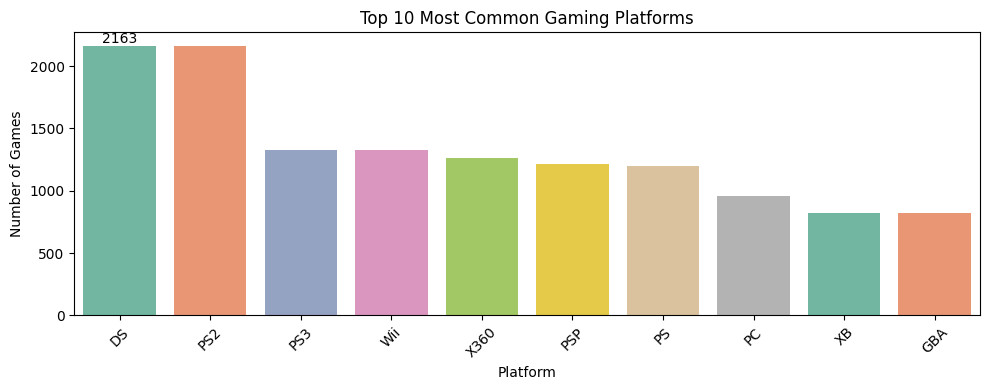

In [160]:
plt.figure(figsize=(10, 4))
c = sns.countplot(data=df, x='Platform', order=df['Platform'].value_counts().head(10).index, palette='Set2')
c.bar_label(c.containers[0])
plt.title('Top 10 Most Common Gaming Platforms')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observation:

---> The DS, PS2, and Wii platforms have the highest number of game releases, showing their dominance and developer support during their time.



2. How do sales in North America compare to Europe?

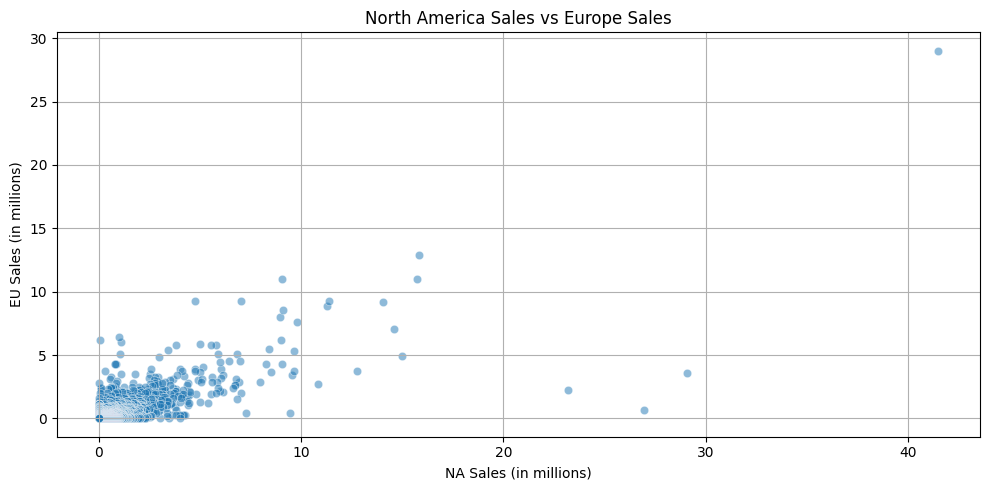

In [181]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='NA_Sales', y='EU_Sales', alpha=0.5)
plt.title('North America Sales vs Europe Sales')
plt.xlabel('NA Sales (in millions)')
plt.ylabel('EU Sales (in millions)')
plt.grid(True)
plt.tight_layout()
plt.show()


Why does your scatter plot look like this?

Because the sales data is extremely skewed:

Most games sell very few units (under 2 million).

A few games sell huge numbers (up to 40M+), causing the plot to stretch and compress all the lower values into a tight corner.

That’s why you see a dense cluster near the origin (0,0) and just a few dots spread far out.

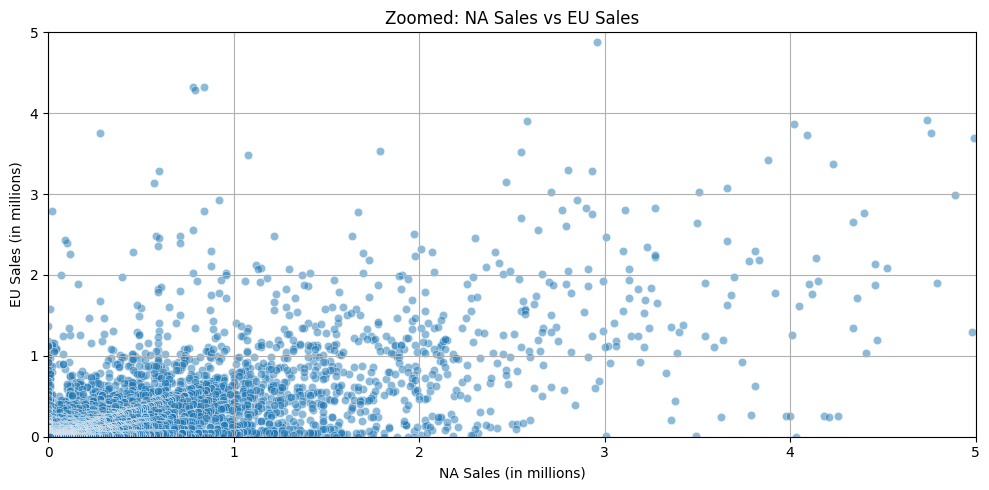

In [182]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='NA_Sales', y='EU_Sales', alpha=0.5)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title('Zoomed: NA Sales vs EU Sales')
plt.xlabel('NA Sales (in millions)')
plt.ylabel('EU Sales (in millions)')
plt.grid(True)
plt.tight_layout()
plt.show()


Observation:

---> This plot will now clearly show:

---> A positive trend: higher NA sales often match higher EU sales.

---> Most games sold under 5 million units in both regions.

---> The outliers (huge-selling titles) are hidden here but can be shown separately if needed.

3. Which genres are the most successful globally on average?

C:\Users\vanda\Flutter projects\digitome_app\ipykernel_24624\3051899781.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Genre', y='Global_Sales', estimator=np.mean, palette='coolwarm')


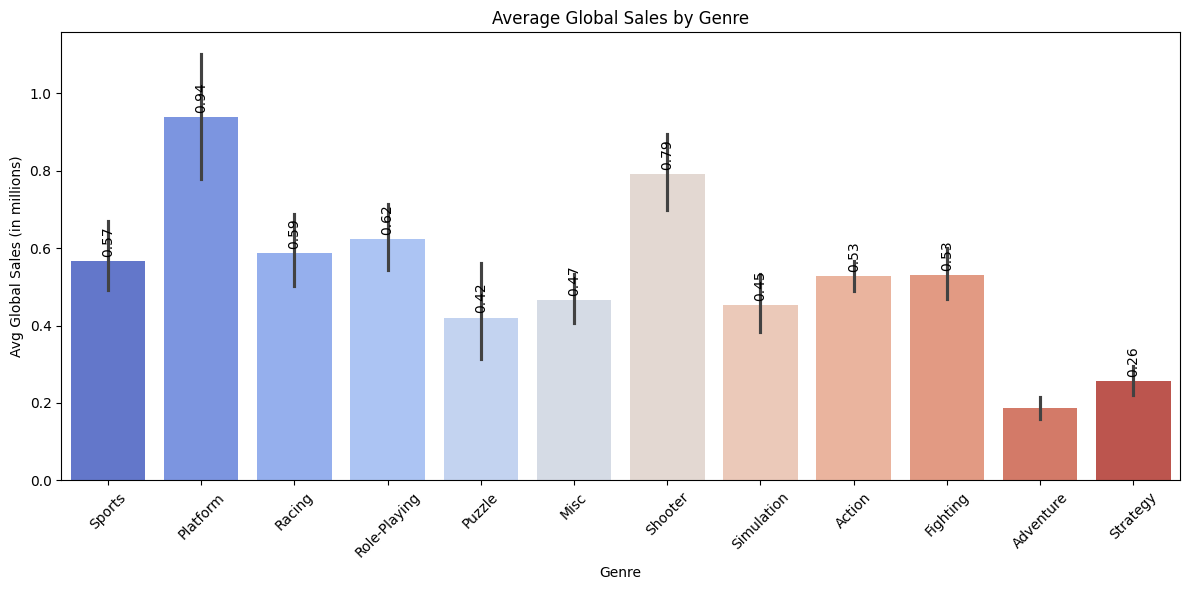

In [186]:
plt.figure(figsize=(12, 6))

# Create bar plot
bar = sns.barplot(data=df, x='Genre', y='Global_Sales', estimator=np.mean, palette='coolwarm')

# Filter out very small bars from getting labels (threshold = 0.2)
for container in bar.containers:
    bar.bar_label(
        container,
        fmt='%.2f',
        label_type='edge',
        padding=3,
        rotation=90,  # Optional: rotate for better visibility
        labels=[
            f'{height:.2f}' if height > 0.2 else ''  # Only label bars > 0.2
            for height in container.datavalues
        ]
    )

# Final touches
plt.title('Average Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Avg Global Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Observation:

---> Shooter and Platform games have the highest average global sales, showing they are the most popular genres worldwide.

---> Genres like Puzzle, Strategy, and Adventure have lower average sales, meaning they appeal to a smaller audience.

---> This shows that fast-paced and action genres perform better in the global market.

4. How does game performance vary across platforms?

C:\Users\vanda\Flutter projects\digitome_app\ipykernel_24624\864898726.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Platform', y='Global_Sales', palette='Set2')


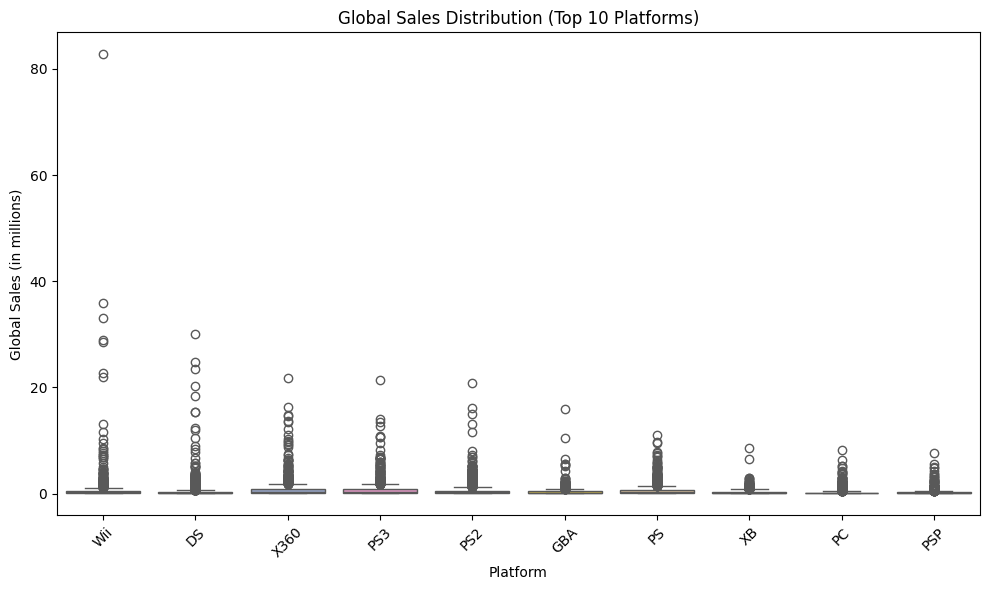

In [179]:
# Get top 10 platforms with the most games
top_platforms = df['Platform'].value_counts().head(10).index
filtered_df = df[df['Platform'].isin(top_platforms)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Platform', y='Global_Sales', palette='Set2')
plt.title('Global Sales Distribution (Top 10 Platforms)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Why is your boxplot compressed like this?

---> Because your data has a lot of extreme outliers (very high sales), especially games like Wii Sports with 80+ million sales, while most others sell under 1 million.

This causes:

The box to appear squished near the bottom (since it shows the interquartile range of small values).

The outliers (circles) to dominate the plot vertically.

The main data becomes visually "invisible" compared to the outliers.

C:\Users\vanda\Flutter projects\digitome_app\ipykernel_24624\699801888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Platform', y='Global_Sales', palette='Set2')


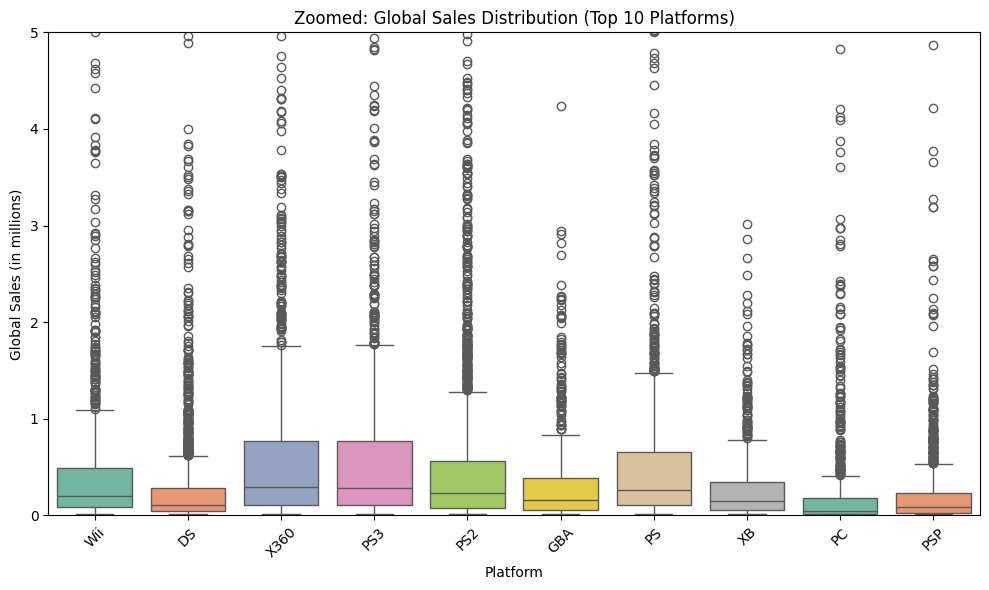

In [180]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Platform', y='Global_Sales', palette='Set2')
plt.ylim(0, 5)  # Limit y-axis to exclude extreme outliers
plt.title('Zoomed: Global Sales Distribution (Top 10 Platforms)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observation:

---> Most games on all top 10 platforms sold less than 2 million units globally.

---> Wii and DS platforms have a slightly higher average sales, while platforms like PC and PSP have lower and more consistent sales.

---> This zoomed view helps clearly compare sales without the distraction of extreme outliers.

5. Which game genres dominate the dataset?

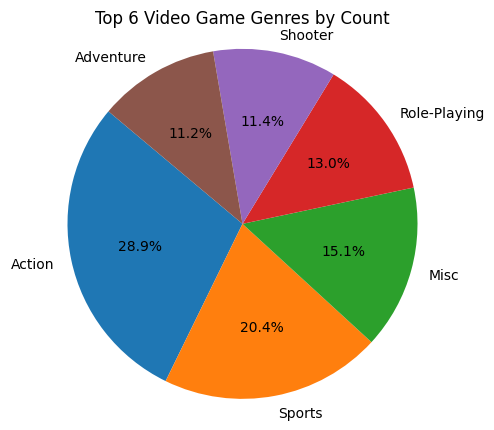

In [173]:
genre_counts = df['Genre'].value_counts().head(6)

plt.figure(figsize=(6, 5))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 6 Video Game Genres by Count')
plt.axis('equal')
plt.show()


Observation:

---> Action, Sports, and Shooter games together make up a large chunk of releases, highlighting player interest in competitive and engaging content.



6. How strongly are sales in different regions correlated with global sales?

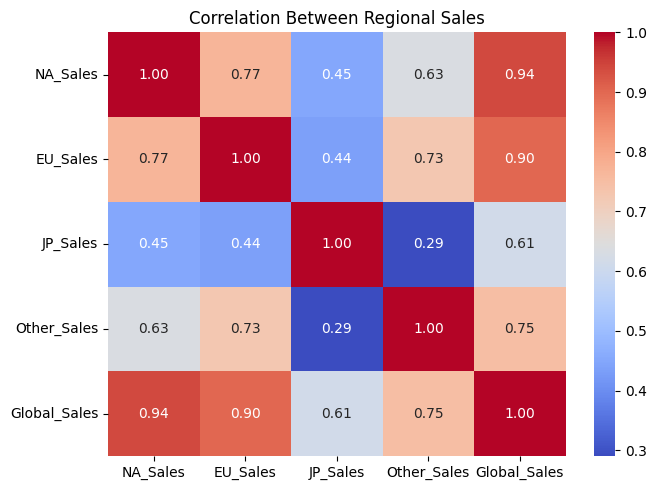

In [174]:
plt.figure(figsize=(7, 5))
corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Regional Sales')
plt.tight_layout()
plt.show()


Observation:

---> Global_Sales is strongly correlated with both NA_Sales and EU_Sales, while JP_Sales has weaker correlation, indicating that global sales are more influenced by Western markets.

7. How do video game sales compare between North America and Europe?



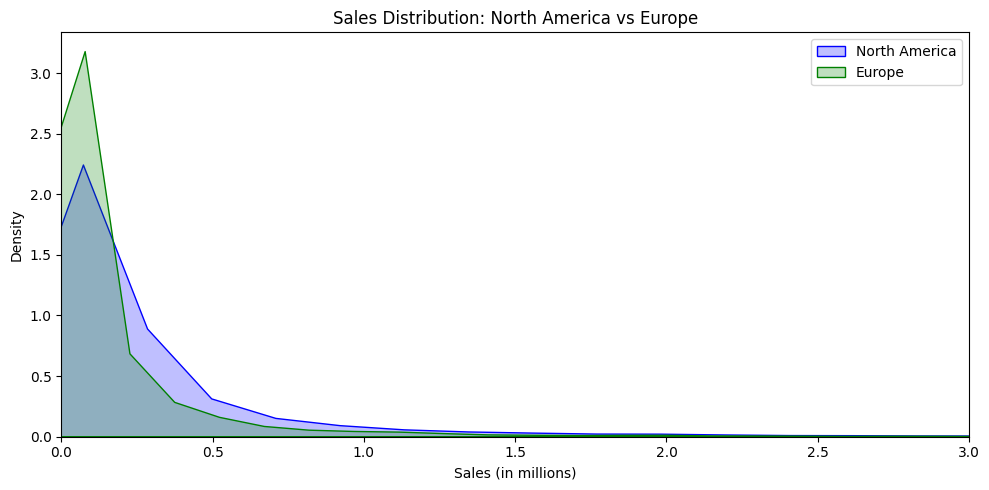

In [178]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['NA_Sales'], label='North America', fill=True, color='blue')
sns.kdeplot(df['EU_Sales'], label='Europe', fill=True, color='green')
plt.xlim(0, 3)  # limit x-axis to focus on common values
plt.title('Sales Distribution: North America vs Europe')
plt.xlabel('Sales (in millions)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


Observation:

---> The KDE plot shows that North America has a higher concentration of high-selling games compared to Europe. 

---> While both regions have most sales clustered below 1 million units, North America has a longer right tail, indicating more best-selling titles. 

---> Europe follows a similar trend but at slightly lower volumes.

# CONCLUSION

---> This project explored global video game sales using data analysis and visualization techniques.

---> We found that Shooter and Platform genres lead in average global sales, while North America and Europe are the most influential markets. 

---> Platforms like Wii, DS, and PS2 have consistently hosted high-selling games. Although some titles have massive global success, most games sell under 1 million units. 

---> The analysis highlights how genre, platform, and region all play a major role in a game's commercial performance. 

---> These insights can guide developers and publishers in targeting the right markets and genres for better success.